#### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

#### Import data

In [2]:
acc_df = pd.read_csv("./UK_car_crash_data/Accidents0515.csv", error_bad_lines=False, warn_bad_lines=False)
veh_df = pd.read_csv("./UK_car_crash_data/Vehicles0515.csv", error_bad_lines=False, warn_bad_lines=False)

#### Data cleaning

In [3]:
#removing rows where values are -1 
for col in acc_df.columns:
    acc_df = (acc_df[acc_df[col]!=-1])
    
for col in veh_df.columns:
    veh_df = (veh_df[veh_df[col]!=-1])

#### Question: Number of accidents in time interval

In [4]:
years = acc_df.loc[:,'Date'].groupby(acc_df['Date'].map(lambda x: x[6:10])).count()
years = pd.DataFrame(data=years)
years['Year'] = years.index
years.columns = ['Accidents', 'Year']

In [5]:
years.head(15)

,Accidents,Year
Date,,
2005,114177,2005
2006,108872,2006
2007,104191,2007
2008,98459,2008
2009,95419,2009
2010,90733,2010
2011,90799,2011
2012,87586,2012
2013,82569,2013


Text(0.5, 0, 'Years')

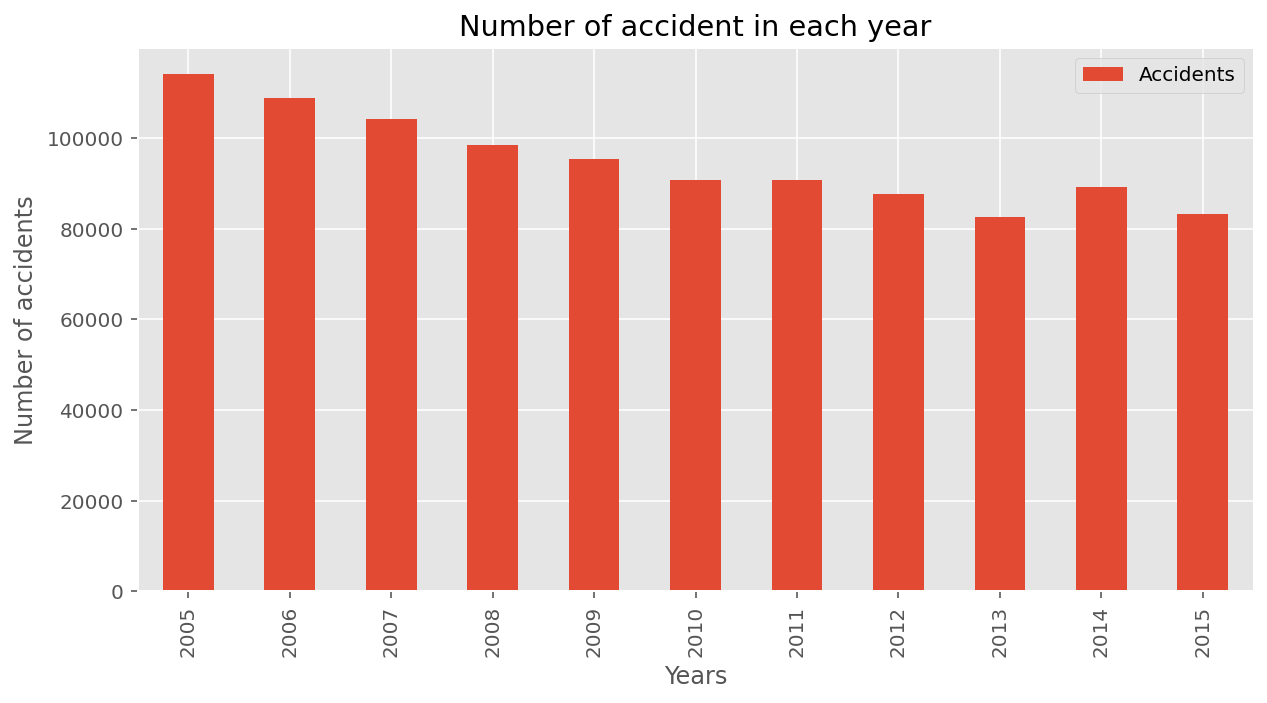

In [6]:
years.plot(kind='bar', title='Number of accident in each year', figsize=(10,5))
plt.ylabel('Number of accidents')
plt.xlabel('Years')

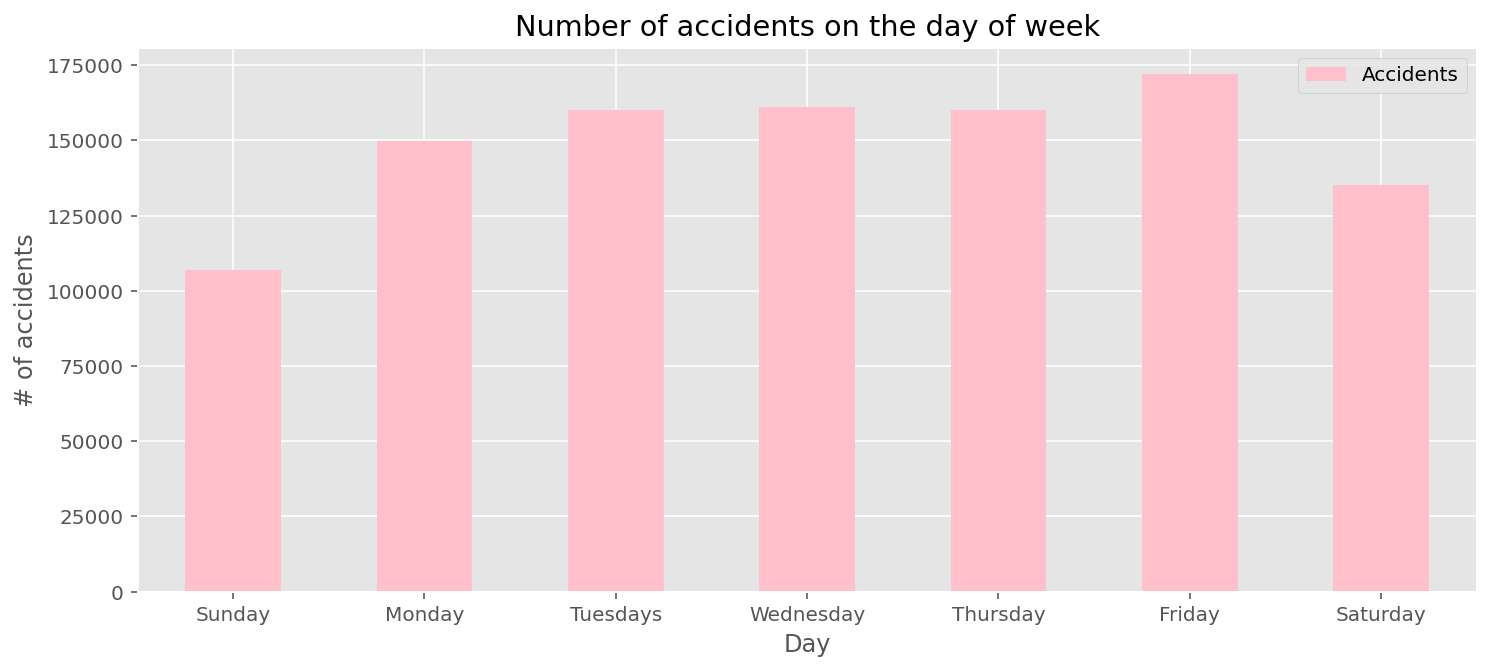

,Accidents,Days
Sunday,106841,Sunday
Monday,149812,Monday
Tuesdays,160006,Tuesdays
Wednesday,161051,Wednesday
Thursday,160007,Thursday


In [7]:
days = acc_df.loc[:, 'Day_of_Week'].groupby(acc_df['Day_of_Week']).count()
days = pd.DataFrame(data=days)
days['days'] = days.index
days.columns = ['Accidents', 'Days']
days['Days'] = ['Sunday', 'Monday', 'Tuesdays', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
days.index = ['Sunday', 'Monday', 'Tuesdays', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
days.plot(kind='bar', color='pink', title='Number of accidents on the day of week', figsize=(12,5), width=0.5, rot=0)
plt.ylabel('# of accidents')
plt.xlabel('Day')
plt.show()
days.head()

array([<AxesSubplot:ylabel='Speed_limit'>], dtype=object)

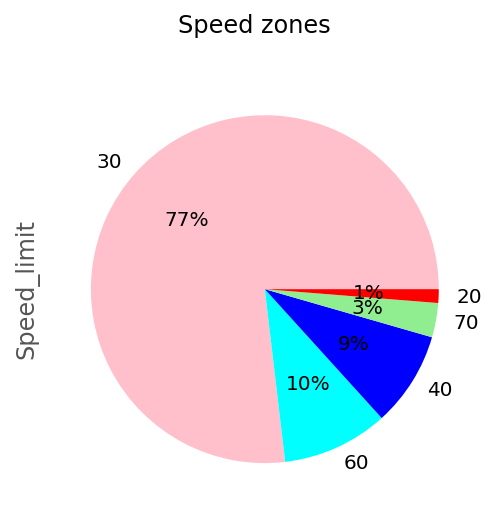

In [8]:
speed1 = acc_df.loc[acc_df['Speed_limit'].isin(['20', '30', '40', '60', '70'])]
speed = speed1.Speed_limit.value_counts()
speed.plot(kind='pie', subplots=True, colors=['pink', 'cyan', 'blue', 'lightgreen', 'red'], autopct='%1.0f%%', title='Speed zones')

#### Question: Which area most accident occurs?

In [9]:
a = acc_df['Road_Type'].unique()
print(a)

[3 6 2 1 7 9]


,Accidents,road
Roundabout,118206,1
One way street,22971,2
Dual carriageway,110625,3
Single carriageway,774985,6
Slip road,13406,7


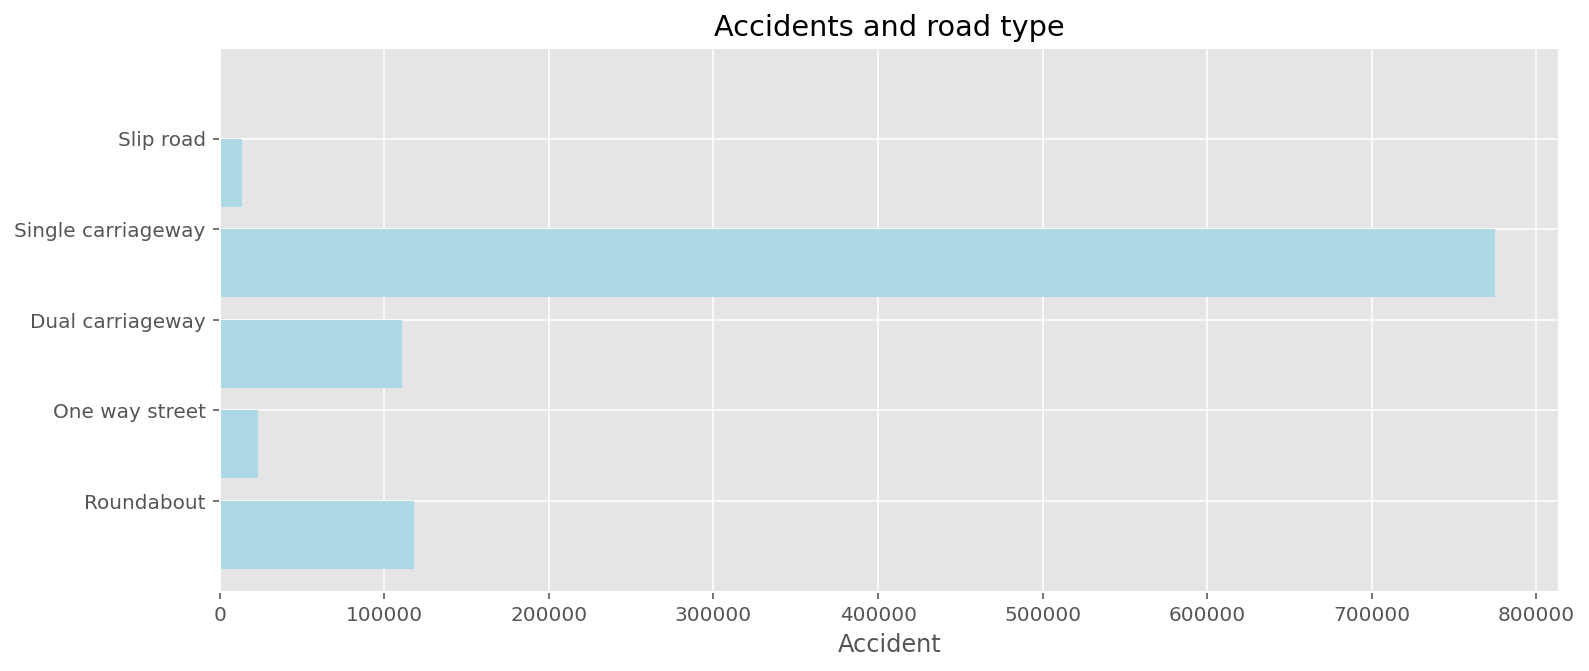

In [10]:
road = acc_df[acc_df.Road_Type!=9]

road1 = road.loc[:, 'Road_Type'].groupby(road['Road_Type']).count()

road = pd.DataFrame(data=road1)
road['road'] = road.index
road.columns = ['Accidents', 'road']
road.index = ['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road']
road.plot(kind='barh',  title='Accidents and road type', figsize=(12,5), legend=False, color='lightblue', alpha=1, width=1.5)
plt.xlabel('Accident')
road.head()

#### Question: Which age group is most likely to be involved in accidents?

In [12]:
# removing unknown values
vehicles = veh_df[veh_df.Journey_Purpose_of_Driver!=15]
vehicles = vehicles[veh_df.Journey_Purpose_of_Driver!=6]
vehicles = vehicles[vehicles.Sex_of_Driver!=0]
vehicles = vehicles[vehicles.Sex_of_Driver!=3]

C:\Users\DooDoo\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.6, 0.98, 'Accidents, age, journey purpose')

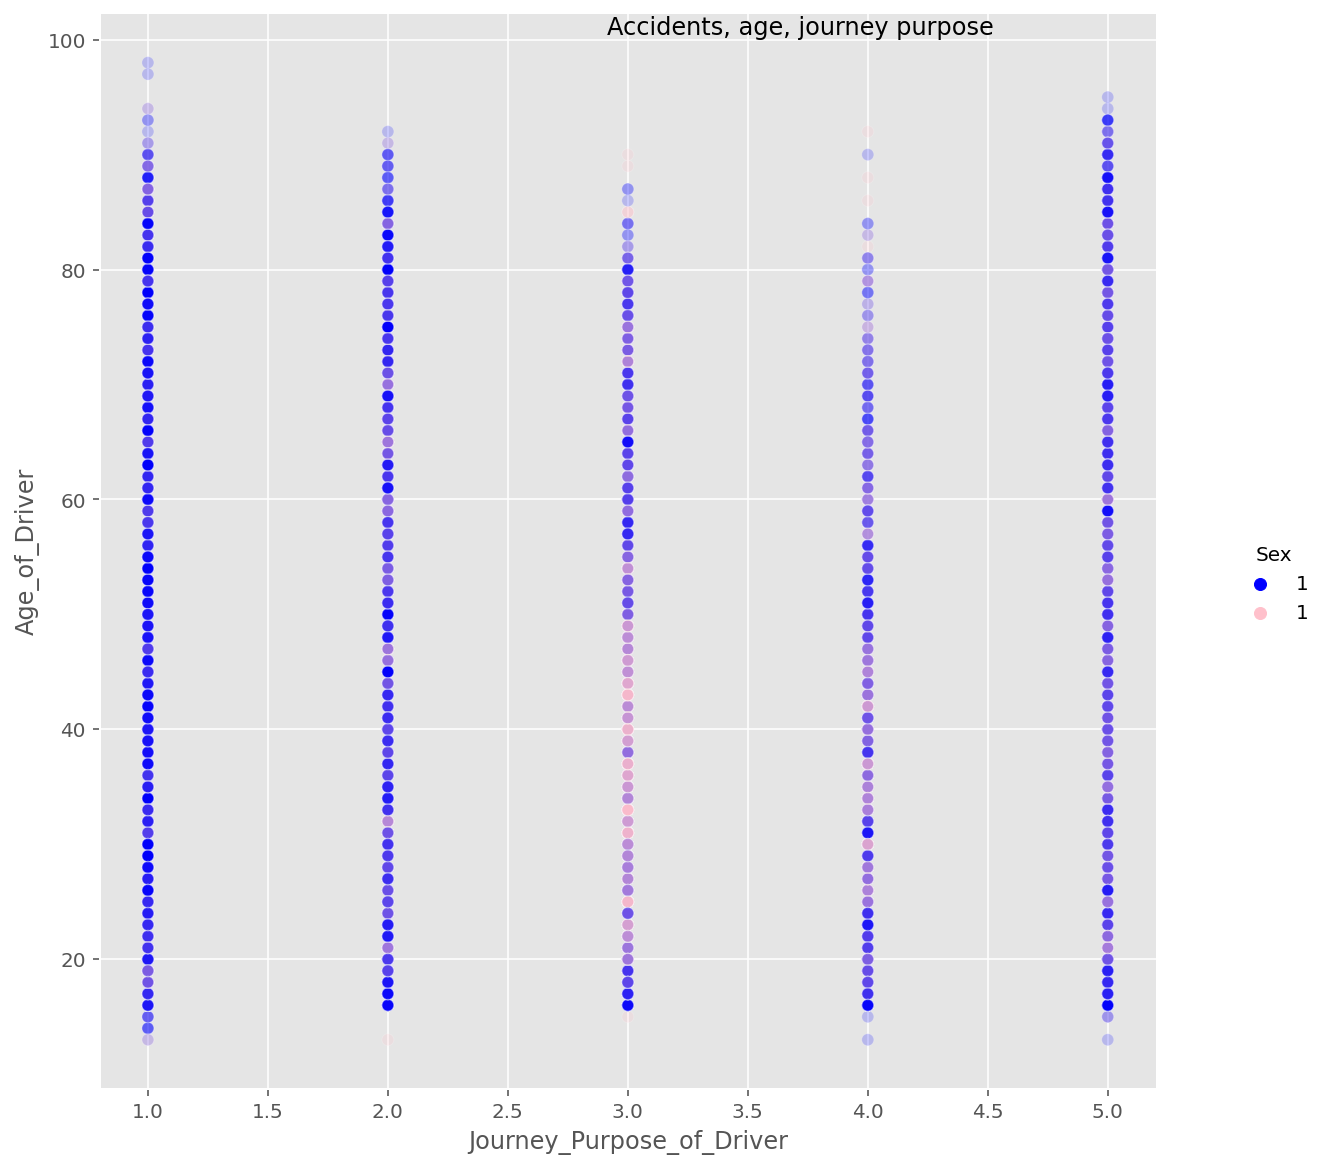

In [13]:
g = sns.relplot(x='Journey_Purpose_of_Driver', y='Age_of_Driver', data=vehicles, hue='Sex_of_Driver', legend='full', palette=['blue', 'pink'], alpha=.2, height=8)

new_title = 'Sex'
g._legend.set_title(new_title)
new_labels = ['', 'Male', 'Female']
for t, l in zip(g._legend.texts, new_labels): t.set_text(1)
    
g.fig.suptitle('Accidents, age, journey purpose', x=.6, y=0.98)

#### Blue means the accidents caused by male.
#### If colour is more pink, more females caused the accidents in particular age.
#### Violet means similar number of men and women caused accidents.

In [14]:
table = {'number': ['1', '2', '3', '4', '5'], 'Journey purpose': ['Journey as part of work','Commuting to/from work','Taking pupil to/from school','Pupil riding to/from school', 'Other']}
journey_purpose = pd.DataFrame.from_dict(table)
journey_purpose

,number,Journey purpose
0,1,Journey as part of work
1,2,Commuting to/from work
2,3,Taking pupil to/from school
3,4,Pupil riding to/from school
4,5,Other


In [15]:
b = veh_df['Age_Band_of_Driver'].unique()
print(b)

[ 6  9  8  7 10  4  5 11  3  2  1]


Text(0.5, 0, 'Age of drivers')

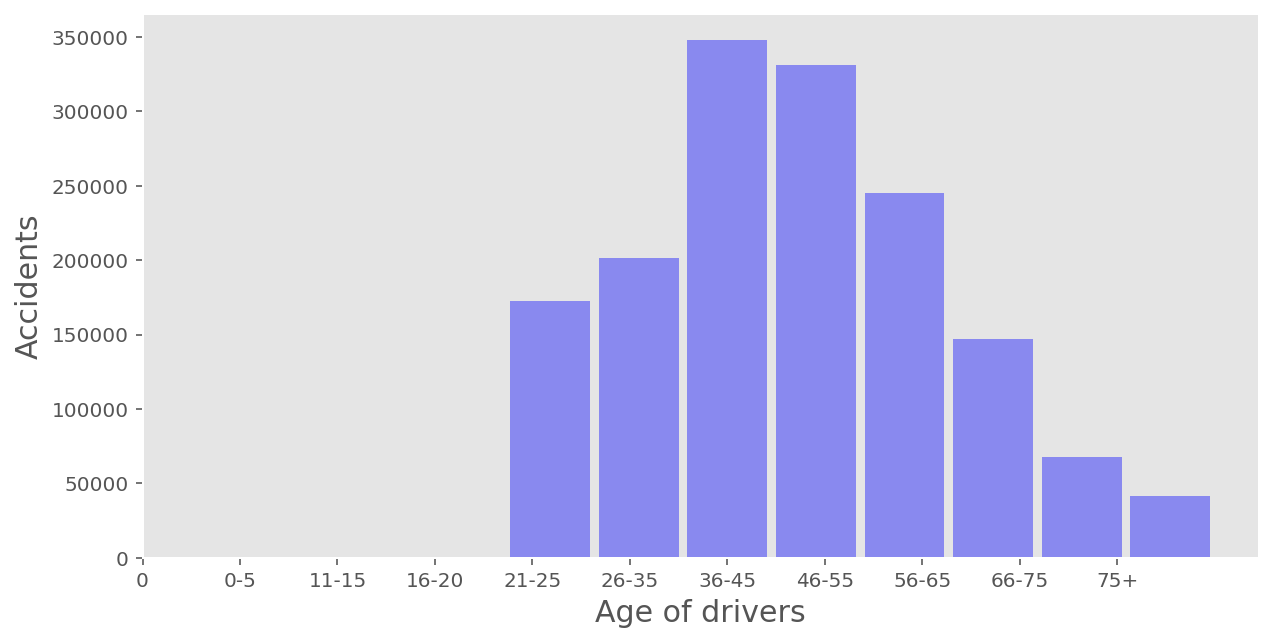

In [16]:
age_group = ['0', '0-5', '11-15', '16-20', '21-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']
veh_df.Age_Band_of_Driver.hist(bins=11, color='blue', alpha=0.4, rwidth=0.9, figsize=(10, 5))
plt.grid(False)
y = np.arange(len(age_group))
plt.xticks(y, age_group)

plt.ylabel('Accidents', fontsize = 15)
plt.xlabel('Age of drivers', fontsize = 15)

#### Accident severity

In [17]:
severity = acc_df.loc[:, 'Accident_Severity'].groupby(acc_df['Accident_Severity']).count()
severity = pd.DataFrame(data=severity)
severity['Accident'] = severity.index
severity.columns = ['Accidents', 'Accident_Severity']
severity['Accident_Severity'] = ['Fatal', 'Serious', 'Slight']
severity.index = ['Fatal', 'Serious', 'Slight']

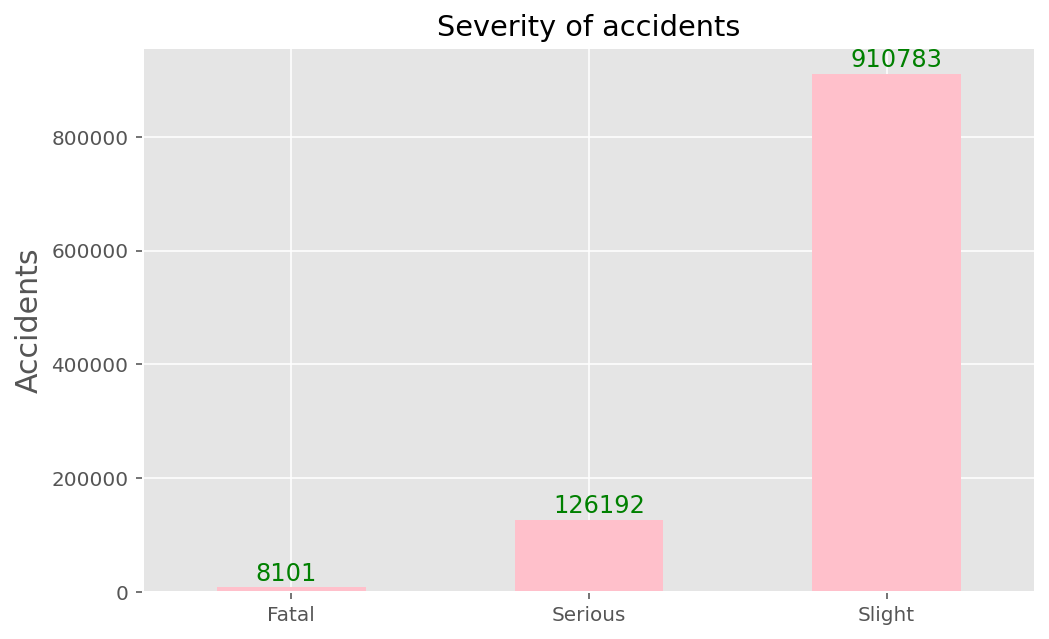

In [18]:
s = severity.plot(kind='bar', color='pink', title='Severity of accidents',
                 figsize=(8,5), legend=False, width=0.5, rot=0)
plt.ylabel('Accidents', fontsize = 15)
plt.xlabel('')

for i in s.patches:
    s.text(i.get_x()+.13, i.get_height()+12000, \
          str(round(i.get_height())), fontsize=12, color='green', rotation=0)

#### Co-relation between accidents, severity and sex

In [19]:
def seriousness(dane, number1, number2, what1, what2):
    tab=dane[dane[what1]==number1]
    tab=tab[tab[what2]==number2]
    return(tab.count())[what1]

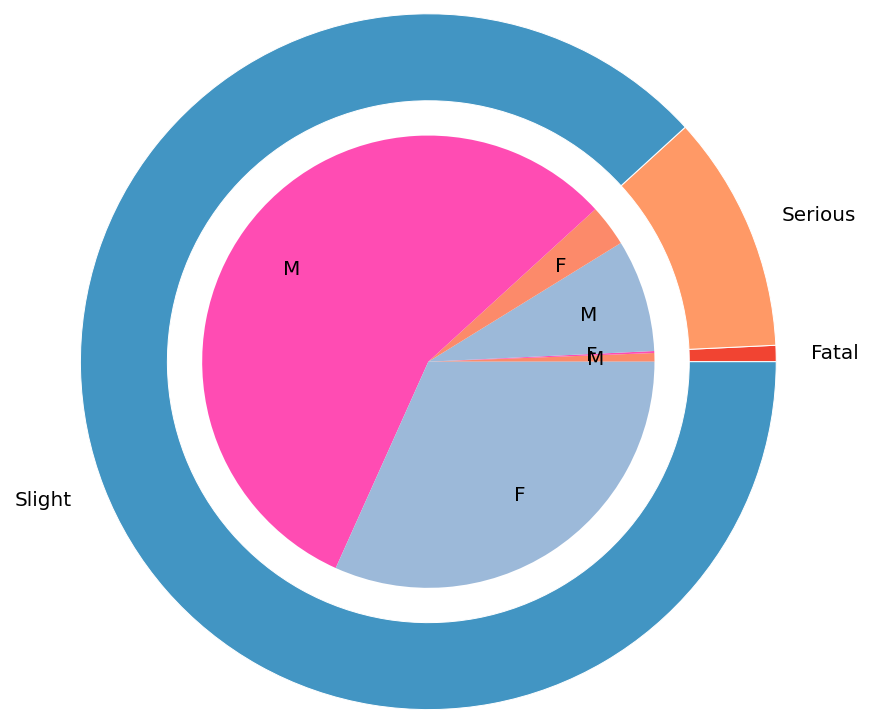

In [20]:
vehicles = veh_df.loc[:,['Accident_Index', 'Sex_of_Driver']]
serious = acc_df.loc[:,['Accident_Index', 'Accident_Severity']]
table1 = pd.merge(serious, vehicles, on='Accident_Index')

m1 = seriousness(table1, 1, 1, 'Accident_Severity', 'Sex_of_Driver')
m2 = seriousness(table1, 2, 1, 'Accident_Severity', 'Sex_of_Driver')
m3 = seriousness(table1, 3, 1, 'Accident_Severity', 'Sex_of_Driver')
f1 = seriousness(table1, 1, 2, 'Accident_Severity', 'Sex_of_Driver')
f2 = seriousness(table1, 2, 2, 'Accident_Severity', 'Sex_of_Driver')
f3 = seriousness(table1, 3, 2, 'Accident_Severity', 'Sex_of_Driver')

group_names = ['Fatal', 'Serious', 'Slight']
group_size = [m1+f1, m2+f2, m3+f3]
subgroup_names = ['M', 'F', 'M', 'F', 'M', 'F']
subgroup_size = [m1, f1, m2, f2, m3, f3]

a, b, c = [plt.cm.Reds, plt.cm.spring, plt.cm.PuBu]

fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)])
plt.setp(mypie, width=0.7, edgecolor='black')

mypie2, _ = ax.pie(subgroup_size, radius=1.6-0.3, labels=subgroup_names,
                  labeldistance=0.7, colors=[a(0.4), b(0.3), c(0.4)])
plt.setp(mypie, width=0.5, edgecolor='white')
plt.margins(0, 0)
plt.show()